In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
path = '../../data/07-05-2021.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-07-06 04:21:32,33.93911,67.709953,125937,5283,75314.0,45340.0,Afghanistan,323.509805,4.194955
1,NaN,NaN,NaN,Albania,2021-07-06 04:21:32,41.15330,20.168300,132537,2456,130029.0,52.0,Albania,4605.497255,1.853067
2,NaN,NaN,NaN,Algeria,2021-07-06 04:21:32,28.03390,1.659600,141966,3765,98748.0,39453.0,Algeria,323.746005,2.652043
3,NaN,NaN,NaN,Andorra,2021-07-06 04:21:32,42.50630,1.521800,13918,127,13721.0,70.0,Andorra,18013.330745,0.912487
4,NaN,NaN,NaN,Angola,2021-07-06 04:21:32,-11.20270,17.873900,39300,915,33739.0,4646.0,Angola,119.575487,2.328244
5,NaN,NaN,NaN,Antigua and Barbuda,2021-07-06 04:21:32,17.06080,-61.796400,1264,42,1222.0,0.0,Antigua and Barbuda,1290.744220,3.322785
6,NaN,NaN,NaN,Argentina,2021-07-06 04:21:32,-38.41610,-63.616700,4552750,96521,4175856.0,280373.0,Argentina,10073.396902,2.120059
7,NaN,NaN,NaN,Armenia,2021-07-06 04:21:32,40.06910,45.038200,225606,4527,217198.0,3881.0,Armenia,7613.506055,2.006596
8,NaN,NaN,Australian Capital Territory,Australia,2021-07-06 04:21:32,-35.47350,149.012400,124,3,121.0,0.0,"Australian Capital Territory, Australia",28.965195,2.419355
9,NaN,NaN,New South Wales,Australia,2021-07-06 04:21:32,-33.86880,151.209300,5997,54,0.0,5943.0,"New South Wales, Australia",73.872875,0.900450


In [5]:
df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [6]:
df.drop(['FIPS', 'Admin2', 'Last_Update', 'Lat', 'Long_', 'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'], axis=1, inplace=True)

In [7]:
df.head()

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,125937,5283,75314.0,45340.0
1,NaN,Albania,132537,2456,130029.0,52.0
2,NaN,Algeria,141966,3765,98748.0,39453.0
3,NaN,Andorra,13918,127,13721.0,70.0
4,NaN,Angola,39300,915,33739.0,4646.0


In [8]:
df.isnull().sum()

Province_State     173
Country_Region       0
Confirmed            0
Deaths               0
Recovered         3277
Active            3279
dtype: int64

In [9]:
df_us = df[df['Country_Region'] == 'US']

In [10]:
df_us.head(10)

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
655,Alabama,US,7262,113,NaN,NaN
656,Alabama,US,22043,315,NaN,NaN
657,Alabama,US,2347,60,NaN,NaN
658,Alabama,US,2693,64,NaN,NaN
659,Alabama,US,6988,139,NaN,NaN
660,Alabama,US,1250,42,NaN,NaN
661,Alabama,US,2264,71,NaN,NaN
662,Alabama,US,14778,330,NaN,NaN
663,Alabama,US,3738,123,NaN,NaN
664,Alabama,US,1874,45,NaN,NaN


In [11]:
df_us.drop(['Recovered', 'Active'], axis=1, inplace=True)

/home/roblivesinottawa/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
df_us.head(10)

,Province_State,Country_Region,Confirmed,Deaths
655,Alabama,US,7262,113
656,Alabama,US,22043,315
657,Alabama,US,2347,60
658,Alabama,US,2693,64
659,Alabama,US,6988,139
660,Alabama,US,1250,42
661,Alabama,US,2264,71
662,Alabama,US,14778,330
663,Alabama,US,3738,123
664,Alabama,US,1874,45


In [13]:
df_us.rename(columns={'Province_State': 'State', 'Country_Region': 'Country'}, inplace=True)

/home/roblivesinottawa/.local/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [14]:
df_us.head()

,State,Country,Confirmed,Deaths
655,Alabama,US,7262,113
656,Alabama,US,22043,315
657,Alabama,US,2347,60
658,Alabama,US,2693,64
659,Alabama,US,6988,139


In [15]:
df_us[df_us['State'] == 'California']['Deaths']

848     1253
849        0
850       47
851      201
852       55
853       16
854      820
855        8
856      113
857     1727
858       20
859       49
860      739
861       36
862     1408
863      245
864       63
865       26
866    24506
867      241
868      233
869        7
870       49
871      470
872        4
873        3
874      494
875       81
876       72
877     5126
878      302
879        4
880     4539
881     1679
882       63
883     5037
884     3780
885      558
886     1410
887      257
888      541
889      460
890     2095
891      208
892      205
893        0
894       29
895      268
896      316
897     1029
898      114
899       63
900        3
901      853
902       64
903        0
904     1033
905      213
906       51
Name: Deaths, dtype: int64

<AxesSubplot:>

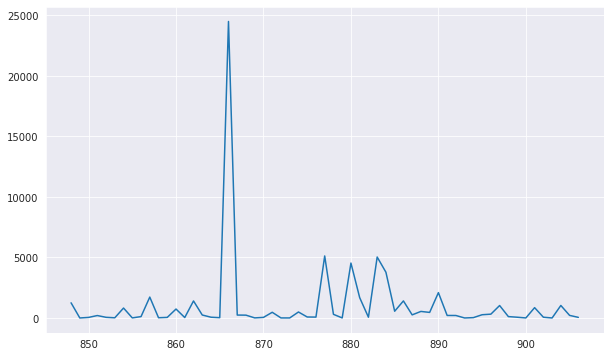

In [16]:
df_us[df_us['State'] == 'California']['Deaths'].plot(kind='line', figsize=(10, 6))

In [17]:
# check the top 5 states with the most deaths
df_us.groupby('State')['Deaths'].sum().sort_values(ascending=False).head(5)

State
California      63286
New York        53496
Texas           52482
Florida         37985
Pennsylvania    27706
Name: Deaths, dtype: int64

In [18]:
df_us.head()

,State,Country,Confirmed,Deaths
655,Alabama,US,7262,113
656,Alabama,US,22043,315
657,Alabama,US,2347,60
658,Alabama,US,2693,64
659,Alabama,US,6988,139


In [19]:
df_us.groupby('State')['Deaths'].sum().sort_values(ascending=False).head(5)

State
California      63286
New York        53496
Texas           52482
Florida         37985
Pennsylvania    27706
Name: Deaths, dtype: int64

<AxesSubplot:xlabel='State'>

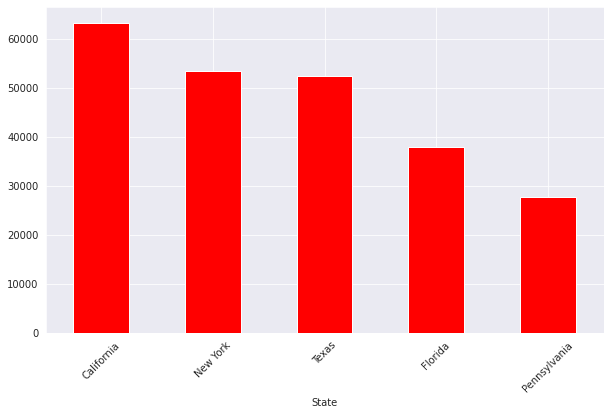

In [20]:
df_us.groupby('State')['Deaths'].sum().sort_values(ascending=False).head(5).plot(kind='bar', figsize=(10, 6), rot=45, color='red')

In [21]:
df.head(10)

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,125937,5283,75314.0,45340.0
1,NaN,Albania,132537,2456,130029.0,52.0
2,NaN,Algeria,141966,3765,98748.0,39453.0
3,NaN,Andorra,13918,127,13721.0,70.0
4,NaN,Angola,39300,915,33739.0,4646.0
5,NaN,Antigua and Barbuda,1264,42,1222.0,0.0
6,NaN,Argentina,4552750,96521,4175856.0,280373.0
7,NaN,Armenia,225606,4527,217198.0,3881.0
8,Australian Capital Territory,Australia,124,3,121.0,0.0
9,New South Wales,Australia,5997,54,0.0,5943.0


In [22]:
df.rename(columns={'Province_State': 'State', 'Country_Region': 'Country'}, inplace=True)

In [23]:
df.head(10)

,State,Country,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,125937,5283,75314.0,45340.0
1,NaN,Albania,132537,2456,130029.0,52.0
2,NaN,Algeria,141966,3765,98748.0,39453.0
3,NaN,Andorra,13918,127,13721.0,70.0
4,NaN,Angola,39300,915,33739.0,4646.0
5,NaN,Antigua and Barbuda,1264,42,1222.0,0.0
6,NaN,Argentina,4552750,96521,4175856.0,280373.0
7,NaN,Armenia,225606,4527,217198.0,3881.0
8,Australian Capital Territory,Australia,124,3,121.0,0.0
9,New South Wales,Australia,5997,54,0.0,5943.0


In [24]:
df_canada = df[df['Country'] == 'Canada']

In [25]:
df_canada.head(10)

,State,Country,Confirmed,Deaths,Recovered,Active
76,Alberta,Canada,232236,2303,229102.0,831.0
77,British Columbia,Canada,147790,1759,145362.0,669.0
78,Diamond Princess,Canada,0,1,0.0,NaN
79,Grand Princess,Canada,13,0,13.0,0.0
80,Manitoba,Canada,56482,1151,54309.0,1022.0
81,New Brunswick,Canada,2338,46,2273.0,19.0
82,Newfoundland and Labrador,Canada,1400,7,1372.0,21.0
83,Northwest Territories,Canada,128,0,128.0,0.0
84,Nova Scotia,Canada,5854,92,5717.0,45.0
85,Nunavut,Canada,657,4,653.0,0.0


In [26]:
df_canada.rename({'State': 'Province'}, axis=1, inplace=True)

/home/roblivesinottawa/.local/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [27]:
df_canada

,Province,Country,Confirmed,Deaths,Recovered,Active
76,Alberta,Canada,232236,2303,229102.0,831.0
77,British Columbia,Canada,147790,1759,145362.0,669.0
78,Diamond Princess,Canada,0,1,0.0,NaN
79,Grand Princess,Canada,13,0,13.0,0.0
80,Manitoba,Canada,56482,1151,54309.0,1022.0
81,New Brunswick,Canada,2338,46,2273.0,19.0
82,Newfoundland and Labrador,Canada,1400,7,1372.0,21.0
83,Northwest Territories,Canada,128,0,128.0,0.0
84,Nova Scotia,Canada,5854,92,5717.0,45.0
85,Nunavut,Canada,657,4,653.0,0.0


In [28]:
df_canada[df_canada.Province == 'Quebec']

,Province,Country,Confirmed,Deaths,Recovered,Active
88,Quebec,Canada,375522,11218,363245.0,732.0


In [29]:
df_canada

,Province,Country,Confirmed,Deaths,Recovered,Active
76,Alberta,Canada,232236,2303,229102.0,831.0
77,British Columbia,Canada,147790,1759,145362.0,669.0
78,Diamond Princess,Canada,0,1,0.0,NaN
79,Grand Princess,Canada,13,0,13.0,0.0
80,Manitoba,Canada,56482,1151,54309.0,1022.0
81,New Brunswick,Canada,2338,46,2273.0,19.0
82,Newfoundland and Labrador,Canada,1400,7,1372.0,21.0
83,Northwest Territories,Canada,128,0,128.0,0.0
84,Nova Scotia,Canada,5854,92,5717.0,45.0
85,Nunavut,Canada,657,4,653.0,0.0


In [30]:
df_canada[df_canada['Province'] == 'Ontario']  

,Province,Country,Confirmed,Deaths,Recovered,Active
86,Ontario,Canada,553551,9215,542430.0,1939.0


In [31]:
df_us.head()


,State,Country,Confirmed,Deaths
655,Alabama,US,7262,113
656,Alabama,US,22043,315
657,Alabama,US,2347,60
658,Alabama,US,2693,64
659,Alabama,US,6988,139


In [32]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 655 to 3931
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      3277 non-null   object
 1   Country    3277 non-null   object
 2   Confirmed  3277 non-null   int64 
 3   Deaths     3277 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 128.0+ KB


In [33]:
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 76 to 91
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Province   16 non-null     object 
 1   Country    16 non-null     object 
 2   Confirmed  16 non-null     int64  
 3   Deaths     16 non-null     int64  
 4   Recovered  16 non-null     float64
 5   Active     15 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 896.0+ bytes


In [34]:
df_brazil = df[df.Country == 'Brazil']

In [35]:
df_brazil.head(20)

,State,Country,Confirmed,Deaths,Recovered,Active
41,Acre,Brazil,85983,1757,82354.0,1872.0
42,Alagoas,Brazil,220022,5433,210634.0,3955.0
43,Amapa,Brazil,117927,1852,97309.0,18766.0
44,Amazonas,Brazil,404347,13349,346721.0,44277.0
45,Bahia,Brazil,1138377,24312,1102758.0,11307.0
46,Ceara,Brazil,893270,22753,626584.0,243933.0
47,Distrito Federal,Brazil,434114,9312,416953.0,7849.0
48,Espirito Santo,Brazil,521830,11556,495815.0,14459.0
49,Goias,Brazil,683684,19409,655260.0,9015.0
50,Maranhao,Brazil,320832,9164,278534.0,33134.0


In [36]:
df.head(10)

,State,Country,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,125937,5283,75314.0,45340.0
1,NaN,Albania,132537,2456,130029.0,52.0
2,NaN,Algeria,141966,3765,98748.0,39453.0
3,NaN,Andorra,13918,127,13721.0,70.0
4,NaN,Angola,39300,915,33739.0,4646.0
5,NaN,Antigua and Barbuda,1264,42,1222.0,0.0
6,NaN,Argentina,4552750,96521,4175856.0,280373.0
7,NaN,Armenia,225606,4527,217198.0,3881.0
8,Australian Capital Territory,Australia,124,3,121.0,0.0
9,New South Wales,Australia,5997,54,0.0,5943.0


In [37]:
df_canada.head()

,Province,Country,Confirmed,Deaths,Recovered,Active
76,Alberta,Canada,232236,2303,229102.0,831.0
77,British Columbia,Canada,147790,1759,145362.0,669.0
78,Diamond Princess,Canada,0,1,0.0,NaN
79,Grand Princess,Canada,13,0,13.0,0.0
80,Manitoba,Canada,56482,1151,54309.0,1022.0


In [38]:
df_canada[df_canada['Province'] == 'Ontario'].sort_values(by='Confirmed', ascending=False)

,Province,Country,Confirmed,Deaths,Recovered,Active
86,Ontario,Canada,553551,9215,542430.0,1939.0


In [39]:
import plotly.express as px

In [40]:
df_us.head()

,State,Country,Confirmed,Deaths
655,Alabama,US,7262,113
656,Alabama,US,22043,315
657,Alabama,US,2347,60
658,Alabama,US,2693,64
659,Alabama,US,6988,139


In [44]:
# make a data visualization of the data about Brazil
fig = px.scatter_geo(df_us,
                        locations='State',
                        locationmode='USA-states',
                        color='Confirmed',
                        # hover_name='Country',
                        hover_data=['Confirmed', 'Deaths'],
                        size='Confirmed',
                        size_max=50,
                        range_color=(0, 1000),  # set the range of the color scale
                        projection='natural earth')

fig.show()
                        


In [47]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [48]:
data = dict(type='choropleth',
            colorscale = 'balance',
            locations = df_us['State'],
            z = df_us['Deaths'],
            locationmode = 'USA-states',
            text = df_us['Deaths'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Deaths in the US by COVID-19"}
            )

layout = dict(title = 'July 5th 2021 COVID-19 deaths US',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [50]:
fig = px.scatter_geo(df[df['Country'] == 'Canada'],
                        locations='Country',
                        locationmode='country names',
                        color='Deaths',
                        hover_name='Country',
                        hover_data=['Confirmed', 'Active', 'Recovered', 'Deaths'],
                        size='Confirmed',
                        size_max=50,
                        range_color=(0, 1000),  # set the range of the color scale
                        projection='natural earth')

fig.show()
                        


In [51]:
# make a data visualization of the data about Brazil
fig = px.scatter_geo(df[df['Country'] == 'Brazil'],
                        locations='Country',
                        locationmode='country names',
                        color='Deaths',
                        hover_name='Country',
                        hover_data=['Confirmed', 'Active', 'Recovered', 'Deaths'],
                        size='Confirmed',
                        size_max=50,
                        range_color=(0, 1000),  # set the range of the color scale
                        projection='natural earth')

fig.show()
                        


In [53]:
df[df['Country'] == 'US'].sort_values(by='Confirmed', ascending=False)

,State,Country,Confirmed,Deaths,Recovered,Active
866,California,US,1252739,24506,NaN,NaN
762,Arizona,US,561596,10309,NaN,NaN
1285,Illinois,US,557173,10494,NaN,NaN
1030,Florida,US,511394,6472,NaN,NaN
3420,Texas,US,403645,6600,NaN,NaN
...,...,...,...,...,...,...
751,Alaska,US,0,0,NaN,NaN
2568,New York,US,0,250,NaN,NaN
2828,Ohio,US,0,4,NaN,NaN
3102,Recovered,US,0,0,NaN,NaN


In [57]:
df_us.sort_values(by="Deaths", ascending=True)

,State,Country,Confirmed,Deaths
3047,Puerto Rico,US,2051,0
1666,Kansas,US,0,0
3218,South Dakota,US,0,0
3033,Puerto Rico,US,922,0
3034,Puerto Rico,US,6289,0
...,...,...,...,...
2570,New York,US,278222,9986
762,Arizona,US,561596,10309
2552,New York,US,281604,10489
1285,Illinois,US,557173,10494


In [56]:
df_canada.sort_values(by="Deaths", ascending=True)

,Province,Country,Confirmed,Deaths,Recovered,Active
79,Grand Princess,Canada,13,0,13.0,0.0
83,Northwest Territories,Canada,128,0,128.0,0.0
87,Prince Edward Island,Canada,207,0,206.0,1.0
89,Repatriated Travellers,Canada,13,0,13.0,0.0
78,Diamond Princess,Canada,0,1,0.0,NaN
85,Nunavut,Canada,657,4,653.0,0.0
91,Yukon,Canada,425,5,277.0,143.0
82,Newfoundland and Labrador,Canada,1400,7,1372.0,21.0
81,New Brunswick,Canada,2338,46,2273.0,19.0
84,Nova Scotia,Canada,5854,92,5717.0,45.0


In [58]:
df_us[df_us['State'] == 'New York'].value_counts()

State     Country  Confirmed  Deaths
New York  US       0          250       1
                   92         16        1
                   6672       97        1
                   6699       76        1
                   6974       146       1
                                       ..
                   4571       89        1
                   4855       33        1
                   5209       109       1
                   5442       124       1
                   281604     10489     1
Length: 64, dtype: int64

In [59]:
df_canada[df_canada['Province'] == 'Quebec'].value_counts()

Province  Country  Confirmed  Deaths  Recovered  Active
Quebec    Canada   375522     11218   363245.0   732.0     1
dtype: int64

In [60]:
df_canada.value_counts()

Province                   Country  Confirmed  Deaths  Recovered  Active
Alberta                    Canada   232236     2303    229102.0   831.0     1
British Columbia           Canada   147790     1759    145362.0   669.0     1
Grand Princess             Canada   13         0       13.0       0.0       1
Manitoba                   Canada   56482      1151    54309.0    1022.0    1
New Brunswick              Canada   2338       46      2273.0     19.0      1
Newfoundland and Labrador  Canada   1400       7       1372.0     21.0      1
Northwest Territories      Canada   128        0       128.0      0.0       1
Nova Scotia                Canada   5854       92      5717.0     45.0      1
Nunavut                    Canada   657        4       653.0      0.0       1
Ontario                    Canada   553551     9215    542430.0   1939.0    1
Prince Edward Island       Canada   207        0       206.0      1.0       1
Quebec                     Canada   375522     11218   363245.0   732

In [61]:
df_brazil

,State,Country,Confirmed,Deaths,Recovered,Active
41,Acre,Brazil,85983,1757,82354.0,1872.0
42,Alagoas,Brazil,220022,5433,210634.0,3955.0
43,Amapa,Brazil,117927,1852,97309.0,18766.0
44,Amazonas,Brazil,404347,13349,346721.0,44277.0
45,Bahia,Brazil,1138377,24312,1102758.0,11307.0
46,Ceara,Brazil,893270,22753,626584.0,243933.0
47,Distrito Federal,Brazil,434114,9312,416953.0,7849.0
48,Espirito Santo,Brazil,521830,11556,495815.0,14459.0
49,Goias,Brazil,683684,19409,655260.0,9015.0
50,Maranhao,Brazil,320832,9164,278534.0,33134.0


In [62]:
df_brazil[df_brazil['State'] == 'Rio de Janeiro']['Deaths'].value_counts()

56039    1
Name: Deaths, dtype: int64

In [63]:
df_brazil[df_brazil['State'] == 'Sao Paulo']['Deaths'].value_counts()

129675    1
Name: Deaths, dtype: int64

<AxesSubplot:xlabel='Rio de Janeiro, Brazil COVID-19'>

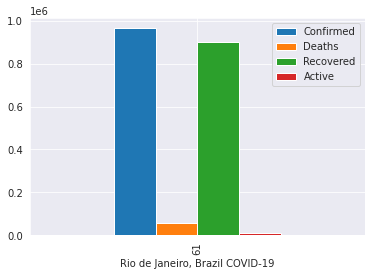

In [76]:
df_brazil[df_brazil['State'] == 'Rio de Janeiro'].sort_values(by='Deaths', ascending=False).plot(kind='bar', legend=True, xlabel='Rio de Janeiro, Brazil COVID-19')

In [85]:
df.columns

Index(['State', 'Country', 'Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

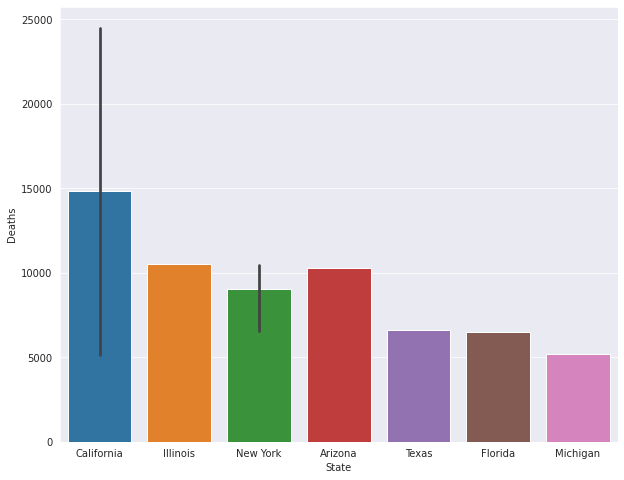

In [93]:
plt.figure(figsize=(10, 8))
sns.barplot(x='State', y='Deaths', data=df_us.sort_values(by='Deaths', ascending=False).head(10))
plt.show()

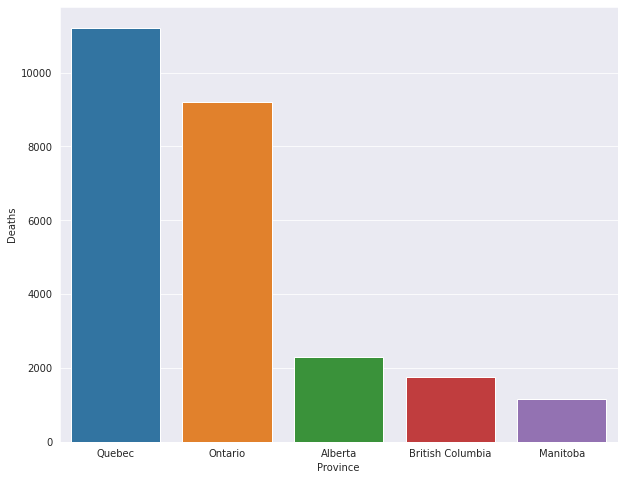

In [97]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Province', y='Deaths', data=df_canada.sort_values(by='Deaths', ascending=False).head(5))
plt.show()

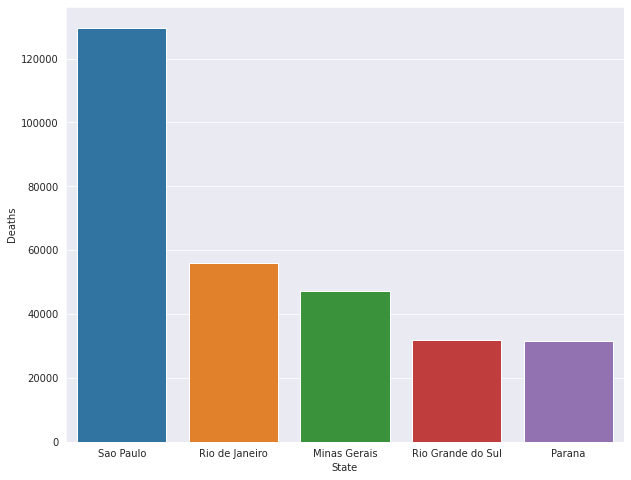

In [99]:
plt.figure(figsize=(10, 8))
sns.barplot(x='State', y='Deaths', data=df_brazil.sort_values(by='Deaths', ascending=False).head(5))
plt.show()

In [102]:
top_ten_world = df.sort_values(by='Confirmed', ascending=False).head(10)

In [103]:
top_ten_world

,State,Country,Confirmed,Deaths,Recovered,Active
269,Maharashtra,India,6104917,123136,5861720.0,120061.0
216,NaN,France,5718270,110270,341121.0,5266879.0
654,NaN,Turkey,5449464,49959,5319665.0,79725.0
6,NaN,Argentina,4552750,96521,4175856.0,280373.0
3966,England,United Kingdom,4282762,112769,0.0,4169993.0
65,Sao Paulo,Brazil,3790090,129675,3395346.0,265069.0
287,NaN,Iran,3270843,84949,2940874.0,245020.0
265,Kerala,India,2981721,13818,2866806.0,101097.0
493,NaN,Poland,2880308,75085,2652228.0,152995.0
264,Karnataka,India,2856491,35434,2779038.0,42019.0


In [105]:
top_ten_world.isnull().sum()

State        5
Country      0
Confirmed    0
Deaths       0
Recovered    0
Active       0
dtype: int64

In [106]:
top_ten_world.dropna()

,State,Country,Confirmed,Deaths,Recovered,Active
269,Maharashtra,India,6104917,123136,5861720.0,120061.0
3966,England,United Kingdom,4282762,112769,0.0,4169993.0
65,Sao Paulo,Brazil,3790090,129675,3395346.0,265069.0
265,Kerala,India,2981721,13818,2866806.0,101097.0
264,Karnataka,India,2856491,35434,2779038.0,42019.0


In [107]:
top_ten_world

,State,Country,Confirmed,Deaths,Recovered,Active
269,Maharashtra,India,6104917,123136,5861720.0,120061.0
216,NaN,France,5718270,110270,341121.0,5266879.0
654,NaN,Turkey,5449464,49959,5319665.0,79725.0
6,NaN,Argentina,4552750,96521,4175856.0,280373.0
3966,England,United Kingdom,4282762,112769,0.0,4169993.0
65,Sao Paulo,Brazil,3790090,129675,3395346.0,265069.0
287,NaN,Iran,3270843,84949,2940874.0,245020.0
265,Kerala,India,2981721,13818,2866806.0,101097.0
493,NaN,Poland,2880308,75085,2652228.0,152995.0
264,Karnataka,India,2856491,35434,2779038.0,42019.0


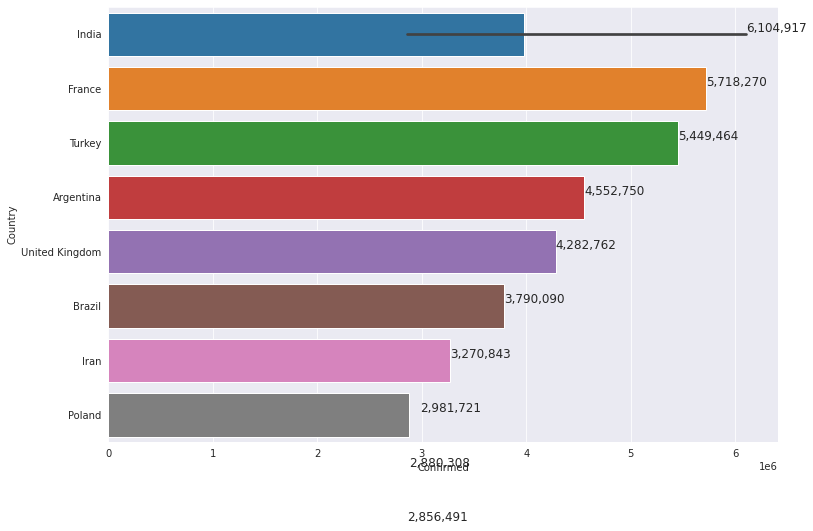

In [108]:
plt.figure(figsize=(12, 8))
plot = sns.barplot(x='Confirmed', y='Country', data=top_ten_world)
for i, (value, name) in enumerate(zip(top_ten_world['Confirmed'], top_ten_world['Country'])):
    plot.text(value, i - 0.05, f"{value:,.0f}", size=12)

plt.show()

In [109]:
plt.figure(figsize=(12, 8))
plot = sns.barplot(x='Confirmed', y='State', data=df_us)
for i, (value, name) in enumerate(zip(df_us['Confirmed'], df_us['State'])):
    plot.text(value, i - 0.05, f"{value:,.0f}", size=12)

plt.show()